# Crop Yield Dataset

Dataset Source - [Crop Yield dataset on Kaggle](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/data?select=yield_df.csv)

The dataset contains area, item, pesticides used per tonne,average rainfall,area yield,average temperature.The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

Load necessary libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df_crop = pd.read_csv("yield_df.csv")
df_crop.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Inspect the dataset

In [3]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [10]:
df_crop.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


Check the missing values

In [6]:
df_crop.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [14]:
df_crop.drop(columns=['Unnamed: 0'],inplace=True)


Check outliers

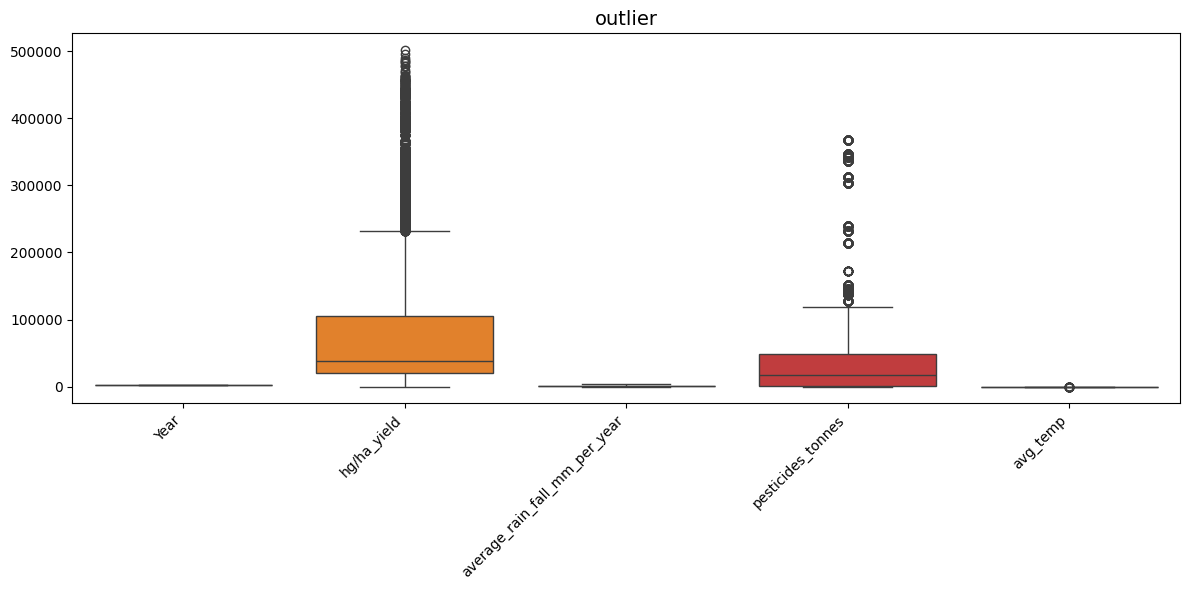

In [17]:
numeric_cols = df_crop.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_crop[numeric_cols])
plt.xticks(rotation =45, ha='right')
plt.title('outlier',fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
# Highest yield values
df_crop[['Area', 'Item', 'hg/ha_yield']].sort_values(by='hg/ha_yield', ascending=False).head(10)

# Highest pesticide values
df_crop[['Area', 'Item', 'pesticides_tonnes']].sort_values(by='pesticides_tonnes', ascending=False).head(10)


,Area,Item,pesticides_tonnes
4818,Brazil,Yams,367778.0
4756,Brazil,"Rice, paddy",367778.0
4746,Brazil,Potatoes,367778.0
4747,Brazil,Potatoes,367778.0
4748,Brazil,Potatoes,367778.0
4749,Brazil,Potatoes,367778.0
4750,Brazil,Potatoes,367778.0
4751,Brazil,Potatoes,367778.0
4752,Brazil,Potatoes,367778.0
4753,Brazil,"Rice, paddy",367778.0


In [23]:
# Show extreme pesticide values
df_crop[df_crop['pesticides_tonnes'] > 100000][['Area', 'Item', 'pesticides_tonnes']]


,Area,Item,pesticides_tonnes
681,Argentina,Cassava,105915.04
682,Argentina,Cassava,105915.04
683,Argentina,Maize,105915.04
684,Argentina,Maize,105915.04
685,Argentina,Potatoes,105915.04
...,...,...,...
15709,Italy,Soybeans,100596.40
15710,Italy,Sweet potatoes,100596.40
15711,Italy,Sweet potatoes,100596.40
15712,Italy,Wheat,100596.40


In [24]:
# Cap at 99th percentile
upper = df_crop['pesticides_tonnes'].quantile(0.99)
df_crop['pesticides_tonnes'] = df_crop['pesticides_tonnes'].clip(upper=upper)


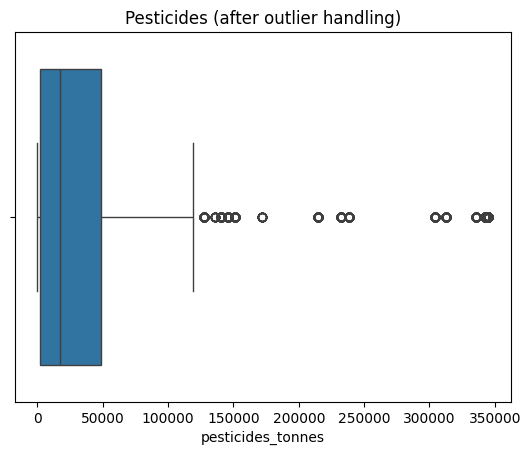

In [25]:


sns.boxplot(x=df_crop['pesticides_tonnes'])
plt.title("Pesticides (after outlier handling)")
plt.show()


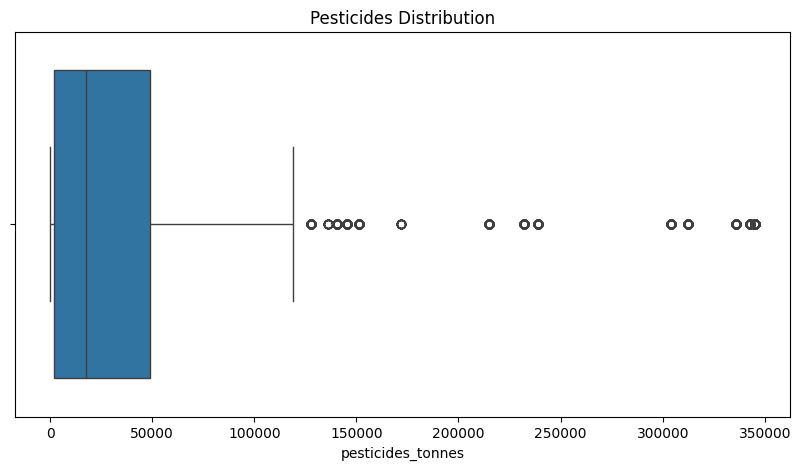

count     28242.00000
mean      36991.69615
std       59504.12535
min           0.04000
25%        1702.00000
50%       17529.44000
75%       48687.88000
max      345026.00000
Name: pesticides_tonnes, dtype: float64


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
plt.figure(figsize=(10,5))
sns.boxplot(x=df_crop['pesticides_tonnes'])
plt.title("Pesticides Distribution")
plt.show()

# Quick stats
print(df_crop['pesticides_tonnes'].describe())


Check the correlation

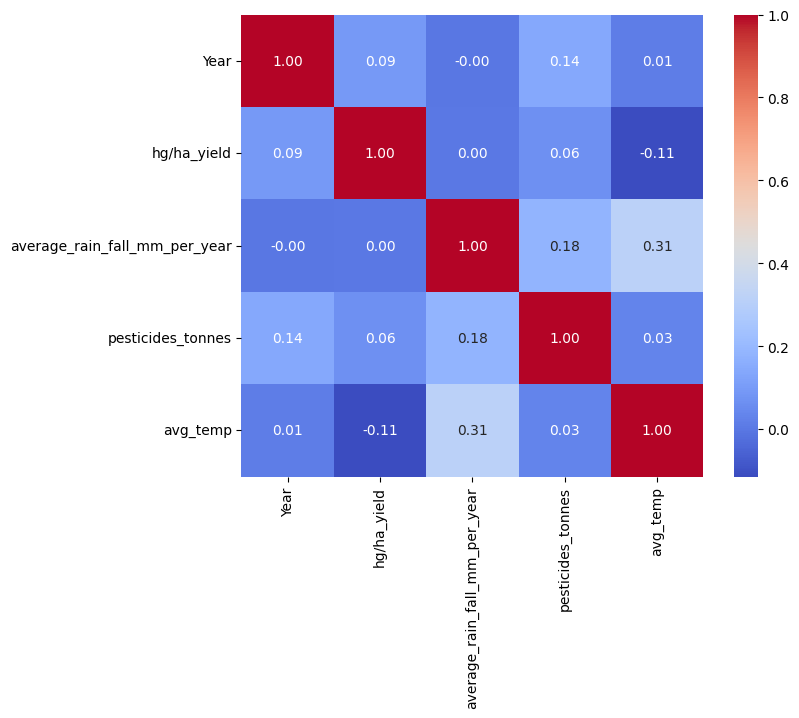

In [34]:
numeric_cols = df_crop.select_dtypes(include=['int64','float64']).columns
corr_matrix =df_crop[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',square=True)
plt.show()

In [35]:
df_crop.to_csv('cleaned_crop_yield.csv',index=False)